In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import LSTM, Dense
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# loading the data from yfinance
BSE_data = yf.download('^BSESN', start='2003-07-14', end='2022-03-31')

[*********************100%%**********************]  1 of 1 completed


In [3]:
BSE_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000
...,...,...,...,...,...,...
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300


In [4]:
BSE_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4.606000e+03
mean,23100.937607,23235.534925,22918.775904,23076.196657,23076.196657,8.657262e+04
std,13104.862941,13149.280095,13022.556807,13086.905843,13086.905843,1.102551e+06
min,3557.129883,3582.080078,3534.060059,3554.129883,3554.129883,1.000000e+02
25%,14271.722656,14385.204834,14118.345215,14254.017334,14254.017334,1.080000e+04
50%,19486.264648,19621.059570,19338.184570,19456.884766,19456.884766,1.480000e+04
75%,31215.802246,31295.949707,31039.829590,31158.527832,31158.527832,2.160000e+04
max,62156.480469,62245.429688,61624.648438,61765.589844,61765.589844,3.181510e+07


In [5]:
BSE_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4606 entries, 2003-07-14 to 2022-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4606 non-null   float64
 1   High       4606 non-null   float64
 2   Low        4606 non-null   float64
 3   Close      4606 non-null   float64
 4   Adj Close  4606 non-null   float64
 5   Volume     4606 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 251.9 KB


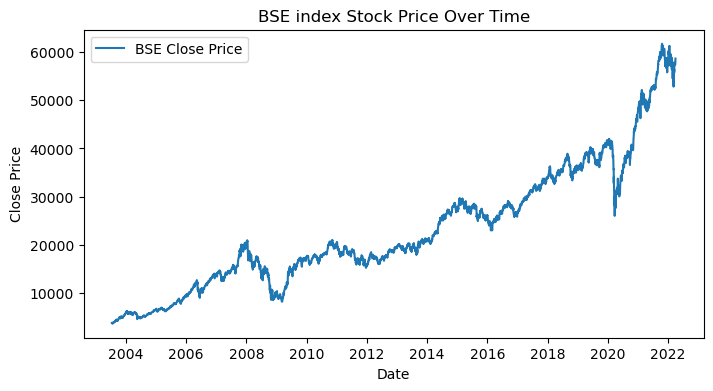

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(BSE_data.index, BSE_data['Close'], label='BSE Close Price')
plt.xlabel('Date') 
plt.ylabel('Close Price')
plt.title('BSE index Stock Price Over Time')
plt.legend()
plt.show()

In [7]:
BSE_data.drop_duplicates(inplace=True)

In [8]:
BSE_data.index = pd.to_datetime(BSE_data.index)

In [9]:
BSE_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000
...,...,...,...,...,...,...
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300


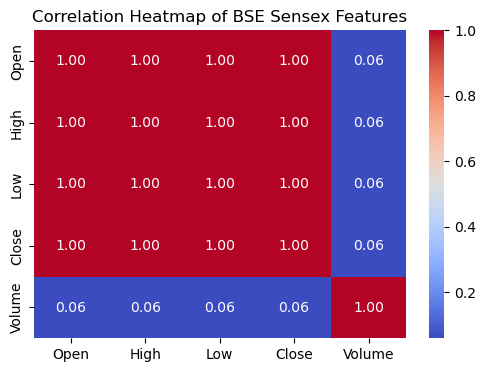

In [10]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = BSE_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of BSE Sensex Features')
plt.show()


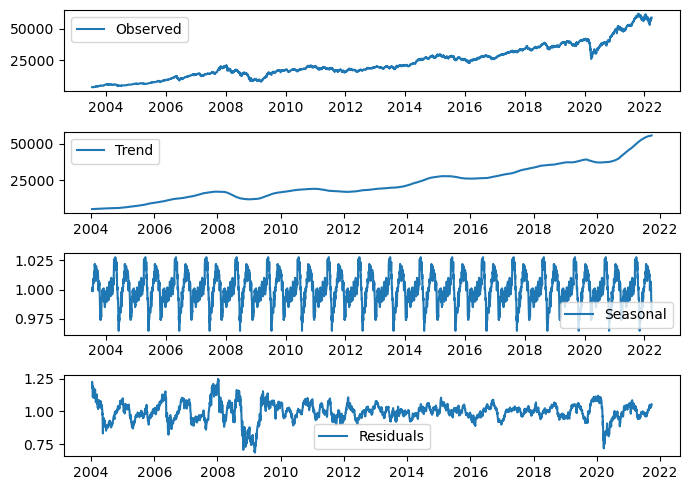

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(BSE_data['Close'], model='multiplicative', period=252)  # Assuming yearly period

# Plot the decomposition components
plt.figure(figsize=(7, 5))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
# feature engineering
# Define the window size for moving averages
window_size = 5
BSE_data['Moving_Avg'] = BSE_data['Close'].rolling(window=window_size).mean()

In [13]:
# Shift the 'Close' column by one to get the next day's closing price
BSE_data['Target'] = BSE_data['Close'].shift(-1)

# Drop the last row as it will have NaN for the 'Target' column (no next day's data)
BSE_data.dropna(subset=['Target'], inplace=True)

In [14]:
BSE_data

,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,Target
Date,,,,,,,,
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200,NaN,3686.340088
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800,NaN,3721.649902
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400,NaN,3668.909912
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000,NaN,3647.580078
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000,3689.045996,3569.580078
...,...,...,...,...,...,...,...,...
2022-03-23,58198.640625,58416.558594,57568.589844,57684.820312,57684.820312,9100,57529.437500,57595.679688
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400,57685.243750,57362.199219
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900,57584.897656,57593.488281


In [15]:
# Verify the shape of the DataFrame after dropping NaN values
print("Shape before dropping NaN values:", BSE_data.shape)

Shape before dropping NaN values: (4605, 8)


In [16]:
# Dropping rows with NaN values
BSE_data.dropna(inplace=True)

# Verify the shape of the DataFrame after dropping NaN values
print("Shape after dropping NaN values:", BSE_data.shape)


Shape after dropping NaN values: (4601, 8)


In [17]:
# Select numerical columns for standardization (excluding any categorical or non-numeric columns)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Moving_Avg', 'Volume','Target']

In [18]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the StandardScaler
scaler = StandardScaler()
#scaler = MinMaxScaler

In [19]:
# Fit and transform the selected columns
BSE_data[numeric_cols] = scaler.fit_transform(BSE_data[numeric_cols])

# View the standardized DataFrame
BSE_data.head()

,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,Target
Date,,,,,,,,
2003-07-18,-1.486788,-1.489533,-1.484154,-1.487249,-1.487249,-0.058609,-1.484169,-1.493288
2003-07-21,-1.486493,-1.491025,-1.488869,-1.493217,-1.493217,-0.060966,-1.486485,-1.494470
2003-07-22,-1.493990,-1.497312,-1.491203,-1.494399,-1.494399,-0.058246,-1.488511,-1.492653
2003-07-23,-1.492873,-1.496207,-1.489825,-1.492581,-1.492581,-0.049724,-1.490714,-1.485757
2003-07-24,-1.491051,-1.490065,-1.488237,-1.485681,-1.485681,-0.038301,-1.490727,-1.481292


In [20]:
# Define the split ratio
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

In [21]:
# Calculate the sizes for each split
total_length = len(BSE_data)
train_size = int(train_ratio * total_length)
validation_size = int(validation_ratio * total_length)
test_size = int(test_ratio * total_length)
print(train_size, validation_size, test_size)

3220 690 690


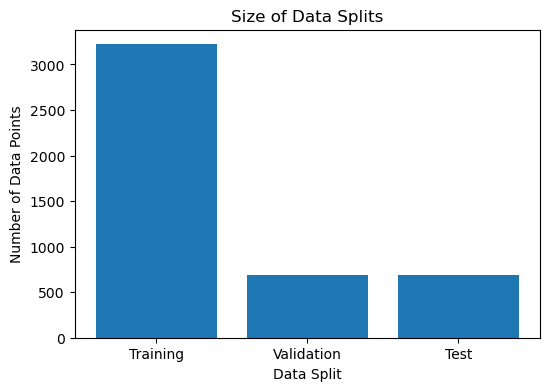

In [22]:

# Split the data into training, validation, and test sets
train_data = BSE_data[:train_size]
validation_data = BSE_data[train_size:train_size + validation_size]
test_data = BSE_data[train_size + validation_size:]

# Define split labels
split_labels = ['Training', 'Validation', 'Test']

# Calculate the lengths of each split
split_lengths = [len(train_data), len(validation_data), len(test_data)]

# Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(split_labels, split_lengths)
plt.xlabel('Data Split')
plt.ylabel('Number of Data Points')
plt.title('Size of Data Splits')
plt.show()

In [23]:
# Check the shape of the split data
print("Training Data Shape:", train_data.shape)
print("Validation Data Shape:", validation_data.shape)
print("Test Data Shape:", test_data.shape)

Training Data Shape: (3220, 8)
Validation Data Shape: (690, 8)
Test Data Shape: (691, 8)


In [24]:
sequence_length = 5
# Feature-Target Split
X_train = train_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Moving_Avg', 'Volume']]
y_train = train_data['Target']

X_val = validation_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Moving_Avg', 'Volume']]
y_val = validation_data['Target']

X_test = test_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Moving_Avg', 'Volume']]
y_test = test_data['Target']

# Adjusting y_train to match X_train shape
y_train = y_train[sequence_length - 1:]
y_val = y_val[sequence_length - 1:]
y_test = y_test[sequence_length - 1:]

# Reshape for LSTM
def reshape_for_lstm(data, sequence_length):
    reshaped_data = []
    for i in range(len(data) - sequence_length + 1):
        reshaped_data.append(data[i:i + sequence_length])
    return np.array(reshaped_data)

# Reshape X_train for LSTM input
X_train_lstm = reshape_for_lstm(X_train.values, sequence_length)
X_val_lstm = reshape_for_lstm(X_val.values, sequence_length)
X_test_lstm = reshape_for_lstm(X_test.values, sequence_length)

# Output shapes
print("X_train shape for LSTM:", X_train_lstm.shape)  # This should show (samples, sequence_length, features)
print("y_train shape:", y_train.shape)  # This should show the shape of y_train
print("X_val shape for LSTM:", X_val_lstm.shape)  # This should show (samples, sequence_length, features)
print("y_val shape:", y_val.shape)  # This should show the updated shape of y_val
print("X_test shape for LSTM:", X_test_lstm.shape)  # This should show (samples, sequence_length, features)
print("y_test shape:", y_test.shape)  # This should show the updated shape of y_test


X_train shape for LSTM: (3216, 5, 7)
y_train shape: (3216,)
X_val shape for LSTM: (686, 5, 7)
y_val shape: (686,)
X_test shape for LSTM: (687, 5, 7)
y_test shape: (687,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error
import numpy as np
import tensorflow as tf

# Define function to create LSTM model
def create_lstm_model(units=64, dropout_rate=0.2, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, return_sequences=True, activation='tanh'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units, activation='tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=optimizer)
    return model

# Define parameter grid for grid search
units = [32, 64, 128, 150]
dropout_rates = [0.2, 0.3, 0.4, 0.5]
optimizers = ['adam', 'rmsprop', 'Adadelta']

best_mse = float('inf')
best_params = {}

# Loop through parameter combinations
for unit in units:
    for dropout_rate in dropout_rates:
        for optimizer in optimizers:
            model = create_lstm_model(units=unit, dropout_rate=dropout_rate, optimizer=optimizer)
            model.fit(X_train_lstm, y_train, epochs=10, batch_size=8, verbose=0)
            y_pred = model.predict(X_val_lstm)
            mse = mean_squared_error(y_val, y_pred)
            if mse < best_mse:
                best_mse = mse
                best_params = {'units': unit, 'dropout_rate': dropout_rate, 'optimizer': optimizer}

print("Best MSE:", best_mse)
print("Best Parameters:", best_params)


22/22 [==============================] - 5s 24ms/step
Best MSE: 0.006342628513917819
Best Parameters: {'units': 64, 'dropout_rate': 0.3, 'optimizer': 'adam'}


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
import tensorflow as tf

# Setting the seed for consistent results
np.random.seed(2016)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Printing the model summary
model.summary()

# Compiling the model
model.compile(loss='mse', optimizer='adam')

# Fitting the model using the training and validation datasets
history = model.fit(
    X_train_lstm,
    y_train,
    validation_data=(X_val_lstm, y_val),
    epochs=50,
    batch_size=50,
    verbose=1
)


Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_156 (LSTM)             (None, 5, 64)             18432     
                                                                 
 dropout_156 (Dropout)       (None, 5, 64)             0         
                                                                 
 lstm_157 (LSTM)             (None, 5, 64)             33024     
                                                                 
 dropout_157 (Dropout)       (None, 5, 64)             0         
                                                                 
 lstm_158 (LSTM)             (None, 64)                33024     
                                                                 
 dropout_158 (Dropout)       (None, 64)                0         
                                                                 
 dense_52 (Dense)            (None, 1)               

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on validation set
y_pred_val = model.predict(X_val_lstm)

# Calculate evaluation metrics: MSE, MAE, R2 for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Validation MSE:", mse_val)
print("Validation MAE:", mae_val)
print("Validation R-squared:", r2_val)



22/22 [==============================] - 7s 17ms/step
Validation MSE: 0.014824636647275855
Validation MAE: 0.04855710157947736
Validation R-squared: 0.8080143901630978


In [36]:
# Evaluate the model on the testing dataset
loss = model.evaluate(X_test_lstm, y_test)

print(f"Loss on test set: {loss}")

# Making predictions on the test set
predictions = model.predict(X_test_lstm)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE, MAE, R-squared
mse_test = mean_squared_error(y_test, predictions)
mae_test = mean_absolute_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R-squared: {r2_test}")


22/22 [==============================] - 0s 14ms/step - loss: 0.0424
Loss on test set: 0.04244895279407501
22/22 [==============================] - 0s 13ms/step
Test MSE: 0.042448956559849774
Test MAE: 0.15388970028782467
Test R-squared: 0.9121370775962733


22/22 [==============================] - 0s 15ms/step


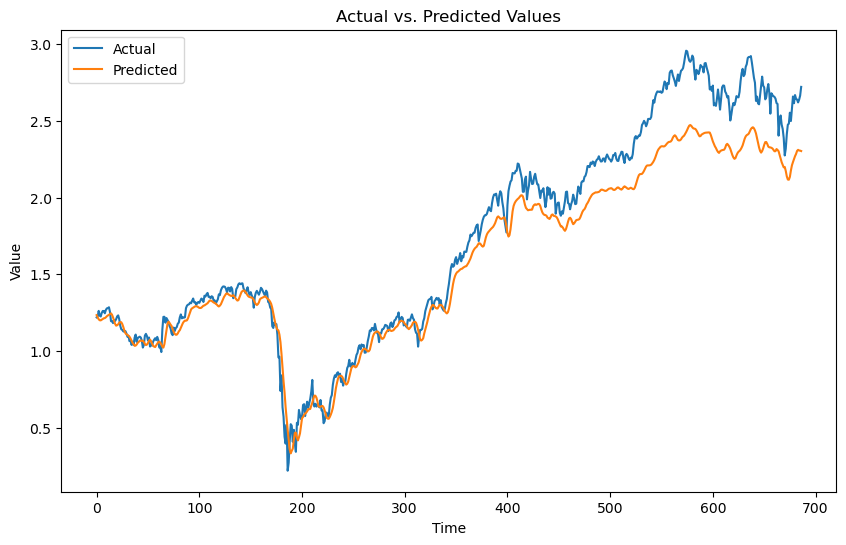

In [37]:
import matplotlib.pyplot as plt

# Making predictions on the test set
predictions = model.predict(X_test_lstm)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [38]:
BSE_data

,Open,High,Low,Close,Adj Close,Volume,Moving_Avg,Target
Date,,,,,,,,
2003-07-18,-1.486788,-1.489533,-1.484154,-1.487249,-1.487249,-0.058609,-1.484169,-1.493288
2003-07-21,-1.486493,-1.491025,-1.488869,-1.493217,-1.493217,-0.060966,-1.486485,-1.494470
2003-07-22,-1.493990,-1.497312,-1.491203,-1.494399,-1.494399,-0.058246,-1.488511,-1.492653
2003-07-23,-1.492873,-1.496207,-1.489825,-1.492581,-1.492581,-0.049724,-1.490714,-1.485757
2003-07-24,-1.491051,-1.490065,-1.488237,-1.485681,-1.485681,-0.038301,-1.490727,-1.481292
...,...,...,...,...,...,...,...,...
2022-03-23,2.681016,2.678327,2.663553,2.647332,2.647332,-0.070304,2.640598,2.638105
2022-03-24,2.603952,2.633507,2.630484,2.640511,2.640511,-0.031955,2.652535,2.620251
2022-03-25,2.650688,2.634831,2.627541,2.622647,2.622647,-0.072298,2.644847,2.637937


In [39]:
# Feature-Target Split
X_train_r = train_data.drop(columns=['Target'])  # Remove the target variable from features
y_train_r = train_data['Target']  # Target variable

# Similarly for validation and test data
X_val_r = validation_data.drop(columns=['Target'])
y_val_r = validation_data['Target']

X_test_r = test_data.drop(columns=['Target'])
y_test_r = test_data['Target']

# Convert to NumPy arrays if needed
X_train_r = X_train_r.values
X_val_r = X_val_r.values
X_test_r = X_test_r.values

# Convert target variables to 1D arrays for Random Forest
y_train_r = y_train_r.values.ravel()
y_val_r = y_val_r.values.ravel()
y_test_r = y_test_r.values.ravel()


In [40]:
print("Training Data - Features Shape:", X_train_r.shape)
print("Training Data - Target Shape:", y_train_r.shape)
print("\nValidation Data - Features Shape:", X_val_r.shape)
print("Validation Data - Target Shape:", y_val_r.shape)
print("\nTest Data - Features Shape:", X_test_r.shape)
print("Test Data - Target Shape:", y_test_r.shape)


Training Data - Features Shape: (3220, 7)
Training Data - Target Shape: (3220,)

Validation Data - Features Shape: (690, 7)
Validation Data - Target Shape: (690,)

Test Data - Features Shape: (691, 7)
Test Data - Target Shape: (691,)


In [41]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#import matplotlib.pyplot as plt

# Create RandomForestRegressor instance
#rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters for grid search
#param_grid = {
    #'n_estimators': [50, 100, 150],
    #'max_depth': [None, 10, 20],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4]
#}

# Perform GridSearchCV
#grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)
#grid_search.fit(X_train_r, y_train_r)

# Get the best parameters
#best_params = grid_search.best_params_
#print("Best Parameters:", best_params)

# Train the RandomForestRegressor with the best parameters
#best_rf_model = RandomForestRegressor(**best_params, random_state=42)
#best_rf_model.fit(X_train_r, y_train_r)

# Predict on validation set
#y_val_pred = best_rf_model.predict(X_val_r)

# Calculate evaluation metrics: MSE, MAE, R2 on validation set
#mse_val = mean_squared_error(y_val_r, y_val_pred)
#mae_val = mean_absolute_error(y_val_r, y_val_pred)
#r2_val = r2_score(y_val_r, y_val_pred)

#print("\nValidation MSE (Random Forest - Best Model):", mse_val)
#print("Validation MAE (Random Forest - Best Model):", mae_val)
#print("Validation R-squared (Random Forest - Best Model):", r2_val)

# Predict on test set
#y_test_pred = best_rf_model.predict(X_test_r)

# Calculate test metrics: MSE, MAE, R2 on test set
#mse_test = mean_squared_error(y_test_r, y_test_pred)
#mae_test = mean_absolute_error(y_test_r, y_test_pred)
#r2_test = r2_score(y_test_r, y_test_pred)

#print("\nTest MSE (Random Forest - Best Model):", mse_test)
#print("Test MAE (Random Forest - Best Model):", mae_test)
#print("Test R-squared (Random Forest - Best Model):", r2_test)

# Visualize test predictions
#plt.figure(figsize=(10, 6))
#plt.plot(y_test_r, label='Actual')
#plt.plot(y_test_pred, label='Predicted')
#plt.title('Test Set: Actual vs Predicted')
#plt.xlabel('Sample')
#plt.ylabel('Target')
#plt.legend()
#plt.show()


Best Parameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}

Validation MSE (SVR - Best Model): 0.01069218996050411
Validation MAE (SVR - Best Model): 0.0629632372553807
Validation R-squared (SVR - Best Model): 0.8622883776396983

Test MSE (SVR - Best Model): 0.011295044182354412
Test MAE (SVR - Best Model): 0.09575276210918243
Test R-squared (SVR - Best Model): 0.9765462502064868


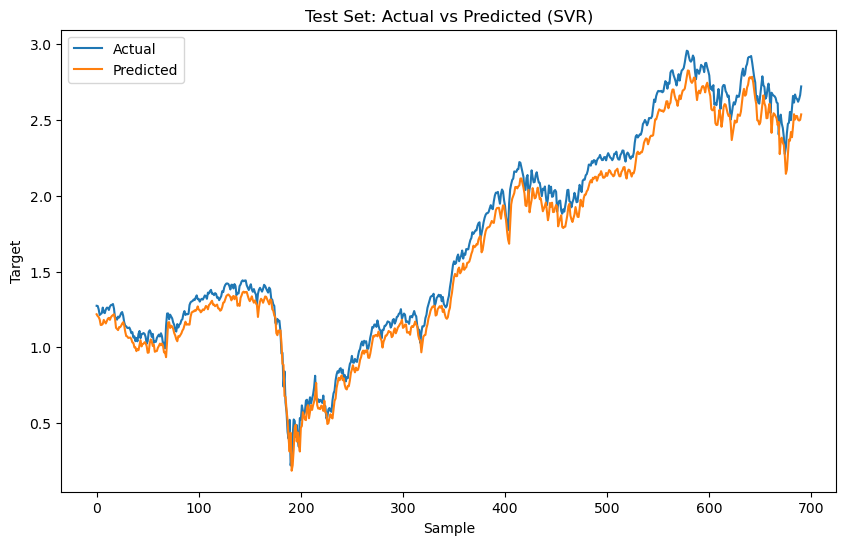

In [42]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Create SVR instance
svr_model = SVR()

# Define hyperparameters for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_r, y_train_r)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the SVR with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_r, y_train_r)

# Predict on validation set
y_val_pred = best_svr_model.predict(X_val_r)

# Calculate evaluation metrics: MSE, MAE, R2 on validation set
mse_val = mean_squared_error(y_val_r, y_val_pred)
mae_val = mean_absolute_error(y_val_r, y_val_pred)
r2_val = r2_score(y_val_r, y_val_pred)

print("\nValidation MSE (SVR - Best Model):", mse_val)
print("Validation MAE (SVR - Best Model):", mae_val)
print("Validation R-squared (SVR - Best Model):", r2_val)

# Predict on test set
y_test_pred = best_svr_model.predict(X_test_r)

# Calculate test metrics: MSE, MAE, R2 on test set
mse_test = mean_squared_error(y_test_r, y_test_pred)
mae_test = mean_absolute_error(y_test_r, y_test_pred)
r2_test = r2_score(y_test_r, y_test_pred)

print("\nTest MSE (SVR - Best Model):", mse_test)
print("Test MAE (SVR - Best Model):", mae_test)
print("Test R-squared (SVR - Best Model):", r2_test)

# Visualize test predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_r, label='Actual')
plt.plot(y_test_pred, label='Predicted')
plt.title('Test Set: Actual vs Predicted (SVR)')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()
plt.show()


In [43]:
# Predict on test set
y_test_pred_svr = best_svr_model.predict(X_test_r)

# Calculate test MSE
test_mse_svr = mean_squared_error(y_test_r, y_test_pred_svr)

print("Test MSE (SVR - Best Model):", test_mse_svr)



Test MSE (SVR - Best Model): 0.011295044182354412


22/22 [==============================] - 0s 13ms/step


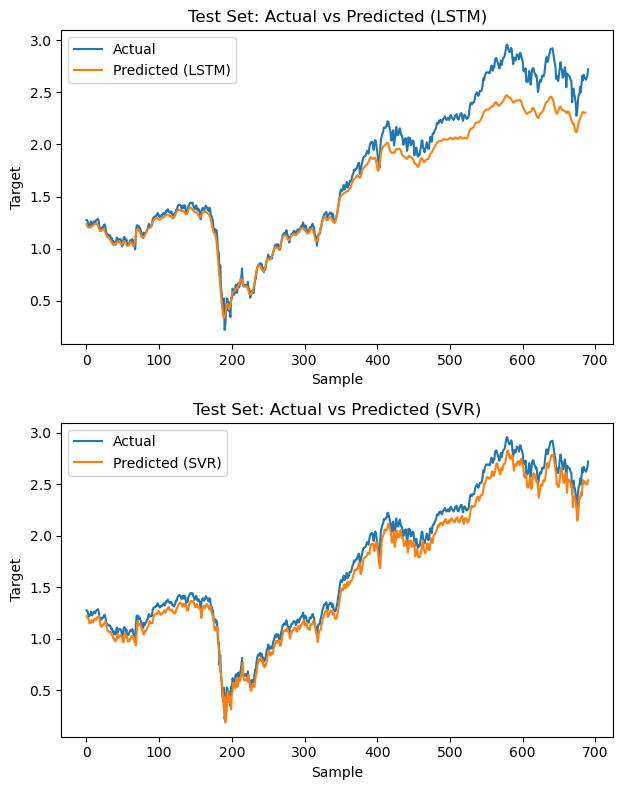

In [44]:
# LSTM predictions
y_test_pred_lstm = model.predict(X_test_lstm)

# Random Forest predictions
#y_test_pred_rf = best_rf_model.predict(X_test_r)

# SVR predictions
y_test_pred_svr = best_svr_model.predict(X_test_r)

# Visualize test predictions for all models
plt.figure(figsize=(12, 8))

# LSTM
plt.subplot(2, 2, 1)
plt.plot(y_test_r, label='Actual')
plt.plot(y_test_pred_lstm, label='Predicted (LSTM)')
plt.title('Test Set: Actual vs Predicted (LSTM)')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()

# Random Forest
#plt.subplot(2, 2, 2)
#plt.plot(y_test_r, label='Actual')
#plt.plot(y_test_pred_rf, label='Predicted (Random Forest)')
#plt.title('Test Set: Actual vs Predicted (Random Forest)')
#plt.xlabel('Sample')
#plt.ylabel('Target')
#plt.legend()

# SVR
plt.subplot(2, 2, 3)
plt.plot(y_test_r, label='Actual')
plt.plot(y_test_pred_svr, label='Predicted (SVR)')
plt.title('Test Set: Actual vs Predicted (SVR)')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()


In [45]:
# reading the datasets into pandas
stock_price = yf.download('^BSESN', start='2003-07-14', end='2022-03-31')
stock_headlines = pd.read_csv('C:\\Users\\sai divya\\Desktop\\india-news-headlines.csv')

[*********************100%%**********************]  1 of 1 completed


In [46]:
# displaying number of records in both stock_price and stock_headlines datasets
len(stock_price), len(stock_headlines)

(4606, 3650970)

In [47]:
# dropping duplicates
stock_price = stock_price.drop_duplicates()

# filtering the important columns required
stock_price = stock_price.filter(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Moving_Avg', 'Volume'])

# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000
...,...,...,...,...,...,...
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300


In [48]:
# dropping duplicates
stock_headlines = stock_headlines.drop_duplicates()

# coverting the datatype of column 'Date' from type string to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()

# filtering the important columns required
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

# grouping the news headlines according to 'Date'
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'Date' as the index column
stock_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2022-03-27,Playing a dead man in Body God meant sitting i...
2022-03-28,As fashion becomes democratic; demand for styl...
2022-03-29,Bobby Deol: Like my dad; I hope to be working ...


In [49]:
# concatenating the datasets stock_price and stock_headlines
stock_data = pd.concat([stock_price, stock_headlines], axis=1)

# dropping the null values if any
stock_data.dropna(axis=0, inplace=True)

# displaying the combined stock_data
stock_data

,Open,High,Low,Close,Adj Close,Volume,headline_text
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200.0,"Hot enough or fast enough?,Fat can be addictiv..."
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800.0,"New boat building yard to be set up in Kochi,N..."
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400.0,"MD's fake diploma finally gets him,India to se..."
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000.0,"Indians are unwilling to swipe their cards,Sou..."
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000.0,Airtel receives Govt nod for additional spectr...
...,...,...,...,...,...,...,...
2022-03-24,57190.050781,57827.988281,57138.511719,57595.679688,57595.679688,51400.0,This all-woman rap group is claiming their spa...
2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900.0,Speeding up; shortcuts and tackling unruly cus...
2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300.0,As fashion becomes democratic; demand for styl...
2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100.0,Bobby Deol: Like my dad; I hope to be working ...


In [50]:
# adding empty sentiment columns to stock_data for later calculation
stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,headline_text,compound,negative,neutral,positive
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200.0,"Hot enough or fast enough?,Fat can be addictiv...",,,,
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800.0,"New boat building yard to be set up in Kochi,N...",,,,
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400.0,"MD's fake diploma finally gets him,India to se...",,,,
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000.0,"Indians are unwilling to swipe their cards,Sou...",,,,
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000.0,Airtel receives Govt nod for additional spectr...,,,,


In [51]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()

# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])

# displaying the stock data
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,headline_text,compound,negative,neutral,positive
2003-07-14,3704.629883,3726.560059,3704.629883,3720.750000,3720.750000,21200.0,"Hot enough or fast enough?,Fat can be addictiv...",-0.9983,0.128,0.822,0.050
2003-07-15,3719.169922,3733.879883,3657.179932,3686.340088,3686.340088,22800.0,"New boat building yard to be set up in Kochi,N...",-0.6484,0.096,0.814,0.090
2003-07-16,3702.139893,3729.020020,3662.699951,3721.649902,3721.649902,18400.0,"MD's fake diploma finally gets him,India to se...",-0.9973,0.127,0.801,0.071
2003-07-17,3728.840088,3750.000000,3660.340088,3668.909912,3668.909912,22000.0,"Indians are unwilling to swipe their cards,Sou...",-0.9991,0.138,0.810,0.052
2003-07-18,3651.389893,3684.229980,3625.729980,3647.580078,3647.580078,22000.0,Airtel receives Govt nod for additional spectr...,0.8516,0.075,0.834,0.090


In [52]:
# dropping the 'headline_text' which is unwanted now
stock_data.drop(['headline_text'], inplace=True, axis=1)

# rearranging the columns of the whole stock_data
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

# displaying the final stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2003-07-14,3720.750000,-0.9983,0.128,0.822,0.050,3704.629883,3726.560059,3704.629883,21200.0
2003-07-15,3686.340088,-0.6484,0.096,0.814,0.090,3719.169922,3733.879883,3657.179932,22800.0
2003-07-16,3721.649902,-0.9973,0.127,0.801,0.071,3702.139893,3729.020020,3662.699951,18400.0
2003-07-17,3668.909912,-0.9991,0.138,0.810,0.052,3728.840088,3750.000000,3660.340088,22000.0
2003-07-18,3647.580078,0.8516,0.075,0.834,0.090,3651.389893,3684.229980,3625.729980,22000.0


In [53]:
# writing the prepared stock_data to disk
stock_data.to_csv('stock_data.csv')

In [54]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('stock_data.csv', index_col = False)

# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)

# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2003-07-14,3720.750000,-0.9983,0.128,0.822,0.050,3704.629883,3726.560059,3704.629883,21200.0
2003-07-15,3686.340088,-0.6484,0.096,0.814,0.090,3719.169922,3733.879883,3657.179932,22800.0
2003-07-16,3721.649902,-0.9973,0.127,0.801,0.071,3702.139893,3729.020020,3662.699951,18400.0
2003-07-17,3668.909912,-0.9991,0.138,0.810,0.052,3728.840088,3750.000000,3660.340088,22000.0
2003-07-18,3647.580078,0.8516,0.075,0.834,0.090,3651.389893,3684.229980,3625.729980,22000.0


In [55]:
# displaying the shape i.e. number of rows and columns of stock_data
stock_data.shape

(4606, 9)

In [56]:
# checking for null values
stock_data.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [57]:
# displaying stock_data statistics
stock_data.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4.606000e+03
mean,23076.196657,-0.898236,0.128575,0.784861,0.086562,23100.937607,23235.534925,22918.775904,8.657262e+04
std,13086.905843,0.410712,0.021306,0.027461,0.016253,13104.862941,13149.280095,13022.556807,1.102551e+06
min,3554.129883,-1.000000,0.038000,0.637000,0.024000,3557.129883,3582.080078,3534.060059,1.000000e+02
25%,14254.017334,-0.999800,0.116000,0.766000,0.076000,14271.722656,14385.204834,14118.345215,1.080000e+04
50%,19456.884766,-0.999500,0.130000,0.782000,0.086000,19486.264648,19621.059570,19338.184570,1.480000e+04
75%,31158.527832,-0.996600,0.142000,0.801000,0.097000,31215.802246,31295.949707,31039.829590,2.160000e+04
max,61765.589844,1.000000,0.216000,0.903000,0.255000,62156.480469,62245.429688,61624.648438,3.181510e+07


In [58]:
# displaying stock_data information
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4606 entries, 2003-07-14 to 2022-03-30
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     4606 non-null   float64
 1   compound  4606 non-null   float64
 2   negative  4606 non-null   float64
 3   neutral   4606 non-null   float64
 4   positive  4606 non-null   float64
 5   Open      4606 non-null   float64
 6   High      4606 non-null   float64
 7   Low       4606 non-null   float64
 8   Volume    4606 non-null   float64
dtypes: float64(9)
memory usage: 359.8+ KB


Text(0, 0.5, 'Close Price ($)')

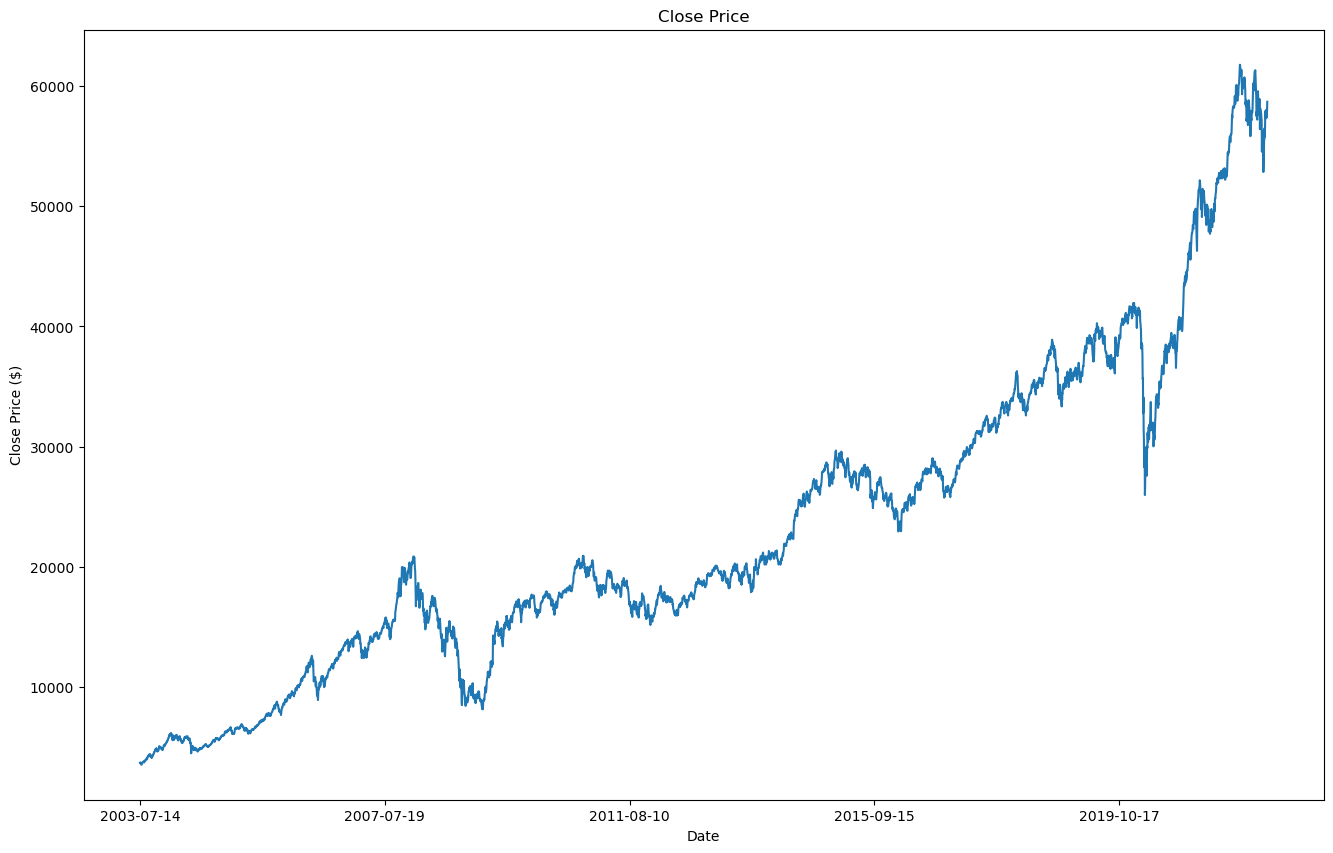

In [59]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [60]:
# Define the window size for moving averages
window_size = 5
stock_data['Moving_Avg'] = stock_data['Close'].rolling(window=window_size).mean()

In [61]:
# Shift the 'Close' column by one to get the next day's closing price
stock_data['Target'] = stock_data['Close'].shift(-1)

# Drop the last row as it will have NaN for the 'Target' column (no next day's data)
stock_data.dropna(subset=['Target', 'Moving_Avg'], inplace=True)

In [62]:
stock_data

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Moving_Avg,Target
Date,,,,,,,,,,,
2003-07-18,3647.580078,0.8516,0.075,0.834,0.090,3651.389893,3684.229980,3625.729980,22000.0,3689.045996,3569.580078
2003-07-21,3569.580078,-0.5972,0.084,0.829,0.087,3655.260010,3664.639893,3564.409912,19400.0,3658.812012,3554.129883
2003-07-22,3554.129883,-0.9987,0.143,0.796,0.061,3557.129883,3582.080078,3534.060059,22400.0,3632.369971,3577.889893
2003-07-23,3577.889893,-0.9993,0.154,0.799,0.047,3571.750000,3596.590088,3551.979980,31800.0,3603.617969,3668.070068
2003-07-24,3668.070068,-0.9973,0.131,0.784,0.085,3595.600098,3677.239990,3572.639893,44400.0,3603.450000,3726.459961
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-23,57684.820312,-0.9999,0.156,0.769,0.075,58198.640625,58416.558594,57568.589844,9100.0,57529.437500,57595.679688
2022-03-24,57595.679688,-0.9999,0.168,0.753,0.080,57190.050781,57827.988281,57138.511719,51400.0,57685.243750,57362.199219
2022-03-25,57362.199219,-0.9999,0.160,0.774,0.066,57801.718750,57845.371094,57100.238281,6900.0,57584.897656,57593.488281


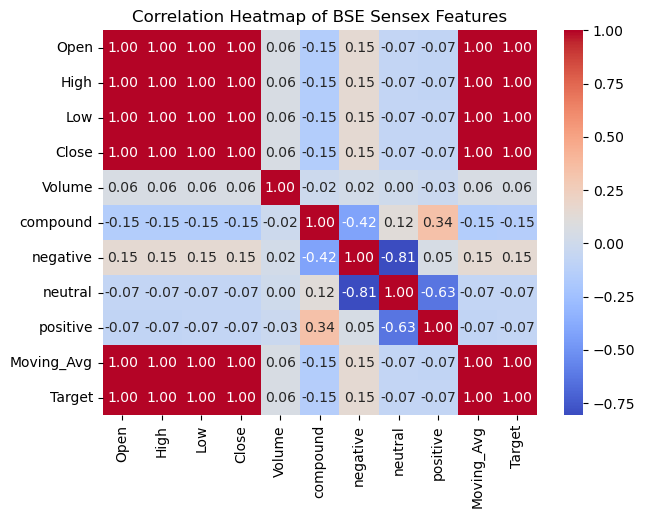

In [63]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume','compound','negative','neutral','positive','Moving_Avg','Target']].corr()

# Create a heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of BSE Sensex Features')
plt.show()


In [64]:
# Select numerical columns for standardization (excluding any categorical or non-numeric columns)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume','compound','Open','High','Low','Moving_Avg','Target']

In [65]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [66]:
# Fit and transform the selected columns
stock_data[numeric_cols] = scaler.fit_transform(stock_data[numeric_cols])

# View the standardized DataFrame
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Moving_Avg,Target
Date,,,,,,,,,,,
2003-07-18,-1.487249,4.258848,0.075,0.834,0.090,-1.486788,-1.489533,-1.484154,-0.058609,-1.484169,-1.493288
2003-07-21,-1.493217,0.732612,0.084,0.829,0.087,-1.486493,-1.491025,-1.488869,-0.060966,-1.486485,-1.494470
2003-07-22,-1.494399,-0.244599,0.143,0.796,0.061,-1.493990,-1.497312,-1.491203,-0.058246,-1.488511,-1.492653
2003-07-23,-1.492581,-0.246059,0.154,0.799,0.047,-1.492873,-1.496207,-1.489825,-0.049724,-1.490714,-1.485757
2003-07-24,-1.485681,-0.241191,0.131,0.784,0.085,-1.491051,-1.490065,-1.488237,-0.038301,-1.490727,-1.481292


In [67]:
# Define the split ratio
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

In [68]:
# Calculate the sizes for each split
total_length_s = len(stock_data)
train_size_s = int(train_ratio * total_length_s)
validation_size_s = int(validation_ratio * total_length_s)
test_size_s = int(test_ratio * total_length_s)
print(train_size_s, validation_size_s, test_size_s)

3220 690 690


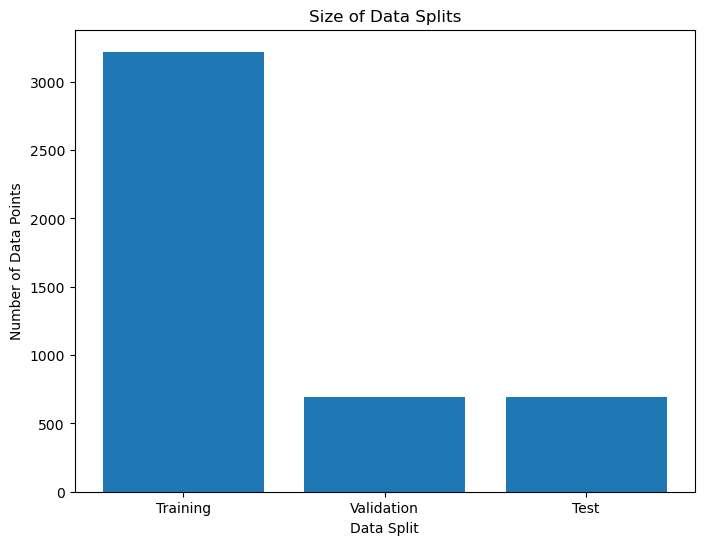

In [69]:

# Split the data into training, validation, and test sets
train_data_s = stock_data[:train_size_s]
validation_data_s = stock_data[train_size_s:train_size_s + validation_size_s]
test_data_s = stock_data[train_size_s + validation_size_s:]

# Define split labels
split_labels = ['Training', 'Validation', 'Test']

# Calculate the lengths of each split
split_lengths = [len(train_data_s), len(validation_data_s), len(test_data_s)]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(split_labels, split_lengths)
plt.xlabel('Data Split')
plt.ylabel('Number of Data Points')
plt.title('Size of Data Splits')
plt.show()

In [70]:
# Check the shape of the split data
print("Training Data Shape:", train_data_s.shape)
print("Validation Data Shape:", validation_data_s.shape)
print("Test Data Shape:", test_data_s.shape)

Training Data Shape: (3220, 11)
Validation Data Shape: (690, 11)
Test Data Shape: (691, 11)


In [71]:
sequence_length = 5
# Feature-Target Split
X_train_s = train_data_s[['Open', 'High', 'Low', 'Close', 'Volume','compound','negative','neutral','positive','Moving_Avg']]
y_train_s = train_data_s['Target']

X_val_s = validation_data_s[['Open', 'High', 'Low', 'Close', 'Volume','compound','negative','neutral','positive','Moving_Avg']]
y_val_s = validation_data_s['Target']

X_test_s = test_data_s[['Open', 'High', 'Low', 'Close', 'Volume','compound','negative','neutral','positive','Moving_Avg']]
y_test_s = test_data_s['Target']

# Adjusting y_train to match X_train shape
y_train_s = y_train_s[sequence_length - 1:]
y_val_s = y_val_s[sequence_length - 1:]
y_test_s = y_test_s[sequence_length - 1:]

# Reshape for LSTM
def reshape_for_lstm(data, sequence_length):
    reshaped_data = []
    for i in range(len(data) - sequence_length + 1):
        reshaped_data.append(data[i:i + sequence_length])
    return np.array(reshaped_data)

# Reshape X_train for LSTM input
X_train_lstm2 = reshape_for_lstm(X_train_s.values, sequence_length)
X_val_lstm2 = reshape_for_lstm(X_val_s.values, sequence_length)
X_test_lstm2 = reshape_for_lstm(X_test_s.values, sequence_length)

# Output shapes
print("X_train shape for LSTM:", X_train_lstm2.shape)  # This should show (samples, sequence_length, features)
print("y_train shape:", y_train_s.shape)  # This should show the shape of y_train
print("X_val shape for LSTM:", X_val_lstm2.shape)  # This should show (samples, sequence_length, features)
print("y_val shape:", y_val_s.shape)  # This should show the updated shape of y_val
print("X_test shape for LSTM:", X_test_lstm2.shape)  # This should show (samples, sequence_length, features)
print("y_test shape:", y_test_s.shape)  # This should show the updated shape of y_test


X_train shape for LSTM: (3216, 5, 10)
y_train shape: (3216,)
X_val shape for LSTM: (686, 5, 10)
y_val shape: (686,)
X_test shape for LSTM: (687, 5, 10)
y_test shape: (687,)


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import numpy as np
import tensorflow as tf

# Setting the seed for consistent results
np.random.seed(2016)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(X_train_lstm2.shape[1], X_train_lstm2.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True, activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Printing the model summary
model.summary()

# Compiling the model
model.compile(loss='mse', optimizer='adam')

# Fitting the model using the training and validation datasets
history = model.fit(
    X_train_lstm2,
    y_train_s,
    validation_data=(X_val_lstm2, y_val_s),
    epochs=60,
    batch_size=55,
    verbose=1
)


Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_171 (LSTM)             (None, 5, 64)             19200     
                                                                 
 dropout_171 (Dropout)       (None, 5, 64)             0         
                                                                 
 lstm_172 (LSTM)             (None, 5, 64)             33024     
                                                                 
 dropout_172 (Dropout)       (None, 5, 64)             0         
                                                                 
 lstm_173 (LSTM)             (None, 64)                33024     
                                                                 
 dropout_173 (Dropout)       (None, 64)                0         
                                                                 
 dense_57 (Dense)            (None, 1)               

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Evaluate the model on validation set
y_pred_val_s = model.predict(X_val_lstm2)

# Calculate evaluation metrics: MSE, MAE, R2 for validation set
mse_val_s = mean_squared_error(y_val_s, y_pred_val_s)
mae_val_s = mean_absolute_error(y_val_s, y_pred_val_s)
r2_val_s = r2_score(y_val_s, y_pred_val_s)

print("Validation MSE:", mse_val_s)
print("Validation MAE:", mae_val_s)
print("Validation R-squared:", r2_val_s)



22/22 [==============================] - 8s 15ms/step
Validation MSE: 0.013827221679646992
Validation MAE: 0.05289616112260647
Validation R-squared: 0.820931355710167


In [84]:
# Evaluate the model on the testing dataset
loss = model.evaluate(X_test_lstm2, y_test_s)

print(f"Loss on test set: {loss}")

# Making predictions on the test set
predictions = model.predict(X_test_lstm2)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate MSE, MAE, R-squared
mse_test = mean_squared_error(y_test_s, predictions)
mae_test = mean_absolute_error(y_test_s, predictions)
r2_test = r2_score(y_test_s, predictions)

print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R-squared: {r2_test}")

22/22 [==============================] - 0s 10ms/step - loss: 0.1442
Loss on test set: 0.1442101001739502
22/22 [==============================] - 0s 12ms/step
Test MSE: 0.14421009845022859
Test MAE: 0.28461825108670596
Test R-squared: 0.7015068987125401


22/22 [==============================] - 1s 14ms/step


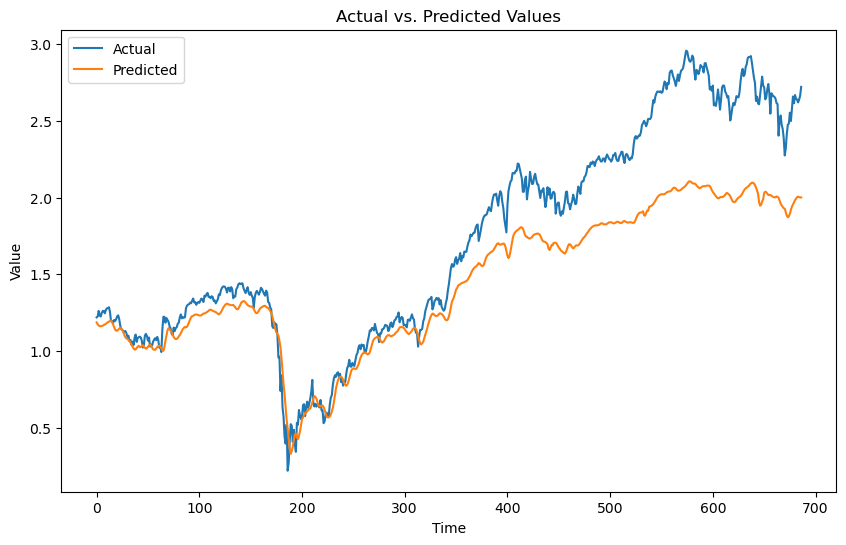

In [85]:
import matplotlib.pyplot as plt

# Making predictions on the test set
predictions = model.predict(X_test_lstm2)

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_s.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [86]:
# Feature-Target Split
X_train_rs = train_data_s.drop(columns=['Target'])  # Remove the target variable from features
y_train_rs = train_data_s['Target']  # Target variable

# Similarly for validation and test data
X_val_rs = validation_data_s.drop(columns=['Target'])
y_val_rs = validation_data_s['Target']

X_test_rs = test_data_s.drop(columns=['Target'])
y_test_rs = test_data_s['Target']

# Convert to NumPy arrays if needed
X_train_rs = X_train_rs.values
X_val_rs = X_val_rs.values
X_test_rs = X_test_rs.values

# Convert target variables to 1D arrays for Random Forest
y_train_rs = y_train_rs.values.ravel()
y_val_rs = y_val_rs.values.ravel()
y_test_rs = y_test_rs.values.ravel()


In [87]:
print("Training Data - Features Shape:", X_train_rs.shape)
print("Training Data - Target Shape:", y_train_rs.shape)
print("\nValidation Data - Features Shape:", X_val_rs.shape)
print("Validation Data - Target Shape:", y_val_rs.shape)
print("\nTest Data - Features Shape:", X_test_rs.shape)
print("Test Data - Target Shape:", y_test_rs.shape)


Training Data - Features Shape: (3220, 10)
Training Data - Target Shape: (3220,)

Validation Data - Features Shape: (690, 10)
Validation Data - Target Shape: (690,)

Test Data - Features Shape: (691, 10)
Test Data - Target Shape: (691,)


Best Parameters: {'C': 5, 'epsilon': 0.1, 'kernel': 'linear'}

Validation MSE (SVR - Best Model): 0.012674913906362098
Validation MAE (SVR - Best Model): 0.08175962589883103
Validation R-squared (SVR - Best Model): 0.8367515949707297

Test MSE (SVR - Best Model): 0.0175952174380653
Test MAE (SVR - Best Model): 0.12256169429324403
Test R-squared (SVR - Best Model): 0.9634641688255156


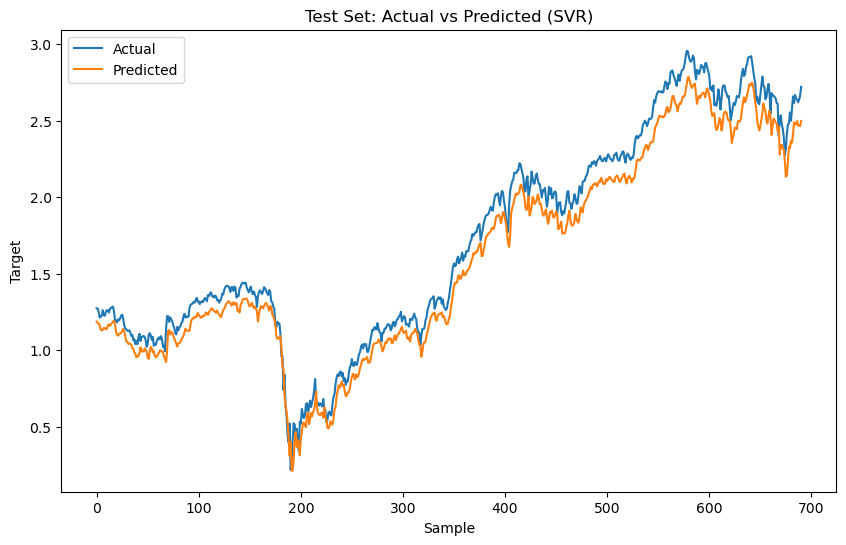

In [88]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Create SVR instance
svr_model = SVR()

# Define hyperparameters for grid search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 5, 10,15],
    'epsilon': [0.1, 0.2, 0.3,0.4,0.5]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=3)
grid_search.fit(X_train_rs, y_train_rs)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the SVR with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_rs, y_train_rs)

# Predict on validation set
y_val_pred_s = best_svr_model.predict(X_val_rs)

# Calculate evaluation metrics: MSE, MAE, R2 on validation set
mse_val_s = mean_squared_error(y_val_rs, y_val_pred_s)
mae_val_s = mean_absolute_error(y_val_rs, y_val_pred_s)
r2_val_s = r2_score(y_val_rs, y_val_pred_s)

print("\nValidation MSE (SVR - Best Model):", mse_val_s)
print("Validation MAE (SVR - Best Model):", mae_val_s)
print("Validation R-squared (SVR - Best Model):", r2_val_s)

# Predict on test set
y_test_pred_s = best_svr_model.predict(X_test_rs)

# Calculate test metrics: MSE, MAE, R2 on test set
mse_test_s = mean_squared_error(y_test_rs, y_test_pred_s)
mae_test_s = mean_absolute_error(y_test_rs, y_test_pred_s)
r2_test_s = r2_score(y_test_rs, y_test_pred_s)

print("\nTest MSE (SVR - Best Model):", mse_test_s)
print("Test MAE (SVR - Best Model):", mae_test_s)
print("Test R-squared (SVR - Best Model):", r2_test_s)

# Visualize test predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_rs, label='Actual')
plt.plot(y_test_pred_s, label='Predicted')
plt.title('Test Set: Actual vs Predicted (SVR)')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()
plt.show()


In [89]:
# Predict on test set
y_test_pred = best_svr_model.predict(X_test_rs)

# Calculate test MSE
test_mse_svr2 = mean_squared_error(y_test_rs, y_test_pred)

print("Test MSE (SVR - Best Model):", test_mse_svr2)


Test MSE (SVR - Best Model): 0.0175952174380653


22/22 [==============================] - 1s 13ms/step


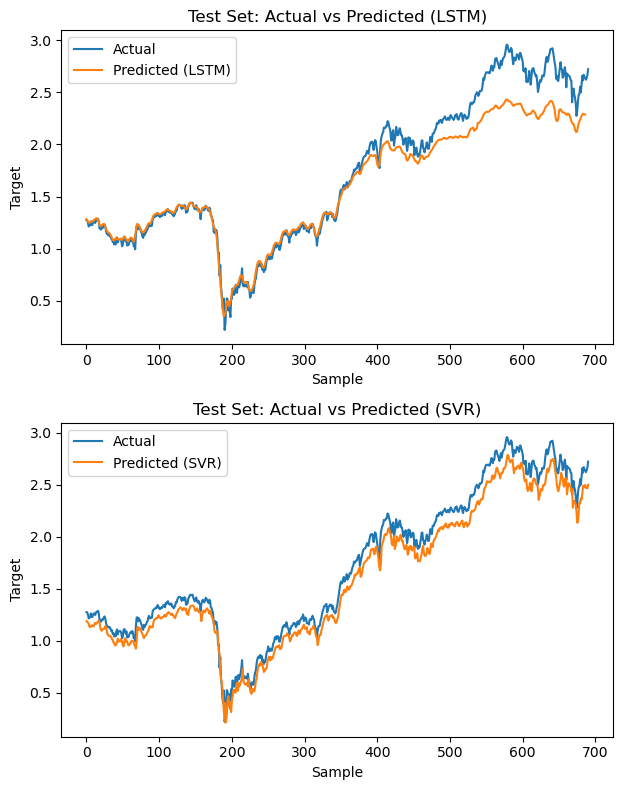

In [77]:
# LSTM predictions
y_test_pred_lstm2 = model.predict(X_test_lstm2)

# SVR predictions
y_test_pred_s = best_svr_model.predict(X_test_rs)

# Visualize test predictions for all models
plt.figure(figsize=(12, 8))

# LSTM
plt.subplot(2, 2, 1)
plt.plot(y_test_rs, label='Actual')
plt.plot(y_test_pred_lstm2, label='Predicted (LSTM)')
plt.title('Test Set: Actual vs Predicted (LSTM)')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()

# SVR
plt.subplot(2, 2, 3)
plt.plot(y_test_rs, label='Actual')
plt.plot(y_test_pred_s, label='Predicted (SVR)')
plt.title('Test Set: Actual vs Predicted (SVR)')
plt.xlabel('Sample')
plt.ylabel('Target')
plt.legend()

plt.tight_layout()
plt.show()
